In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
#read the given data from Kaggle
data = pd.read_csv('Student Mental Health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [3]:
data.info()
#find if there are any data missing from the dataset
#check all the types are correct
#from the information here we can then clean the data as much as we can

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [4]:
type(data['Timestamp'][0])
#checking what data type is 'Timestamp'

str

In [5]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.dtypes
#changing 'Timestamp' to its correct data type

Timestamp                                       datetime64[ns]
Choose your gender                                      object
Age                                                    float64
What is your course?                                    object
Your current year of Study                              object
What is your CGPA?                                      object
Marital status                                          object
Do you have Depression?                                 object
Do you have Anxiety?                                    object
Do you have Panic attack?                               object
Did you seek any specialist for a treatment?            object
dtype: object

In [6]:
data.dropna(inplace = True)
data.shape
#getting rid of any rows that have insufficient data (doesn't have all columns filled up)

(100, 11)

In [7]:
#Rename columns
data.columns = ['Timestamp', 'Gender', 'Age', 'Course', 'Year', 'GPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
data.head(1)

,Timestamp,Gender,Age,Course,Year,GPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No


In [8]:
data['Year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [9]:
def Clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
data['Year'] = data['Year'].apply(Clean)
data['Year'].unique()

array([1, 2, 3, 4])

In [10]:
data['GPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [11]:
def remove_space(string):
    string = string.strip();
    return string
data['GPA'] = data['GPA'].apply(remove_space)
data['GPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [12]:
data['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [13]:
data['Course'].replace({'Engine':'Engineering', 'engin':'Engineering', 'Islamic education': 'Islamic Education', 'BIT': 'IT', 'Laws': 'Law', 'Pendidikan islam': 'Pendidikan Islam', 'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'psychology': 'Psychology', 'Benl': 'BENL', 'koe': 'KOE', 'Fiqh fatwa': 'Fiqh', 'Koe': 'KOE'}, inplace = True)
len(data['Course'].unique())
#The data is quite clean and it is now time to start exploring the data

37

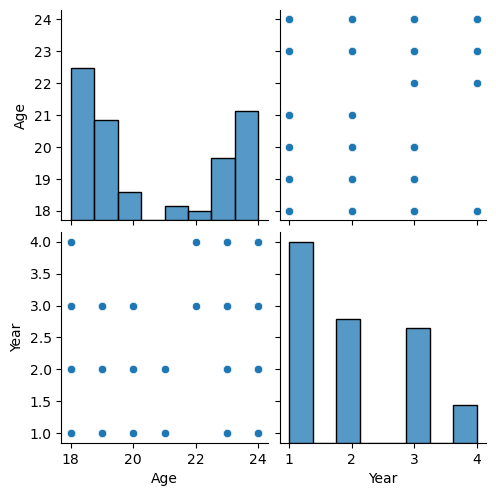

In [14]:
#explore the data for outliers
sns.pairplot(data)

In [15]:
chart = plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Engineering'),
 Text(1, 0, 'IT'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Irkhs'),
 Text(4, 0, 'Psychology'),
 Text(5, 0, 'Banking Studies'),
 Text(6, 0, 'ALA'),
 Text(7, 0, 'BENL'),
 Text(8, 0, 'CTS'),
 Text(9, 0, 'Econs'),
 Text(10, 0, 'Malcom'),
 Text(11, 0, 'Biomedical science'),
 Text(12, 0, 'KOE'),
 Text(13, 0, 'Radiography'),
 Text(14, 0, 'Islamic Education')]

In [16]:
chart = plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Islamic Education'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'Pendidikan Islam'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'KENMS'),
 Text(5, 0, 'IT'),
 Text(6, 0, 'Marine science'),
 Text(7, 0, 'KOE'),
 Text(8, 0, 'Business Administration'),
 Text(9, 0, 'BCS'),
 Text(10, 0, 'Usuluddin '),
 Text(11, 0, 'TAASL'),
 Text(12, 0, 'Human Sciences '),
 Text(13, 0, 'Communication '),
 Text(14, 0, 'Diploma Nursing'),
 Text(15, 0, 'Pendidikan Islam '),
 Text(16, 0, 'Biomedical science')]

In [17]:
chart = plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Law'),
 Text(1, 0, 'Engineering'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Accounting '),
 Text(4, 0, 'IT'),
 Text(5, 0, 'Biomedical science'),
 Text(6, 0, 'KOE'),
 Text(7, 0, 'Irkhs'),
 Text(8, 0, 'BENL'),
 Text(9, 0, 'MHSC'),
 Text(10, 0, 'Biotechnology'),
 Text(11, 0, 'Fiqh fatwa '),
 Text(12, 0, 'DIPLOMA TESL'),
 Text(13, 0, 'Fiqh'),
 Text(14, 0, 'Nursing ')]

In [18]:
chart = plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = data[data['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

[Text(0, 0, 'Mathemathics'),
 Text(1, 0, 'ENM'),
 Text(2, 0, 'BCS'),
 Text(3, 0, 'Engineering'),
 Text(4, 0, 'Kop'),
 Text(5, 0, 'Pendidikan Islam')]

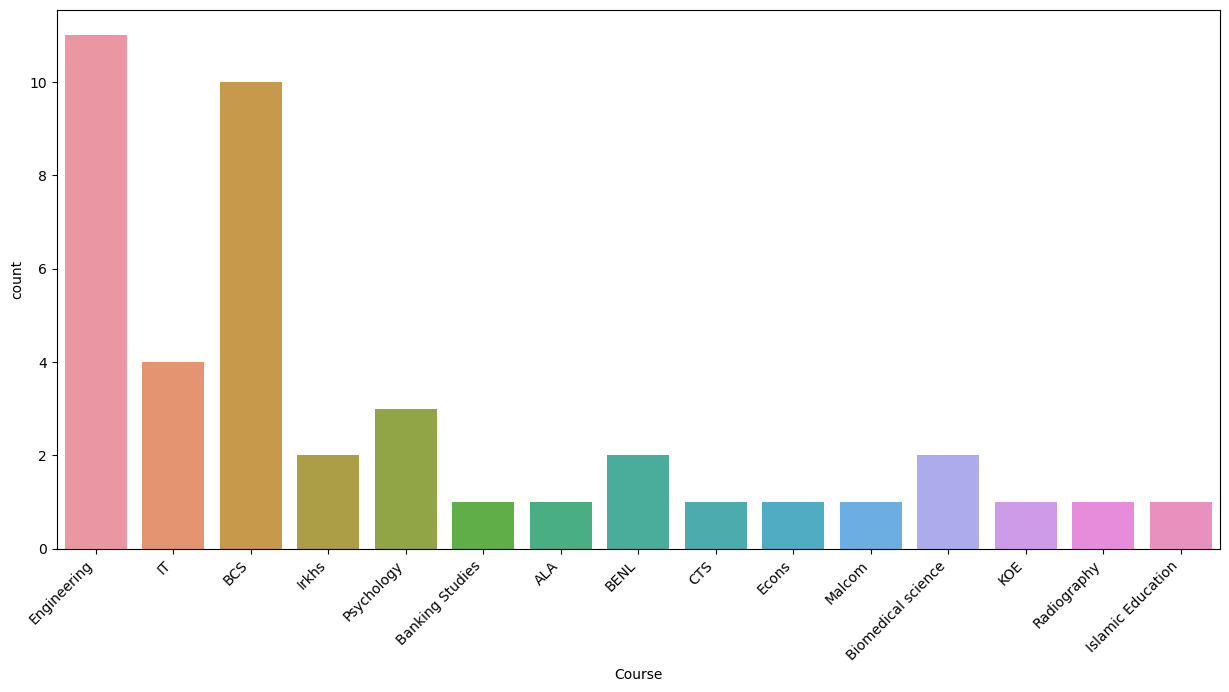

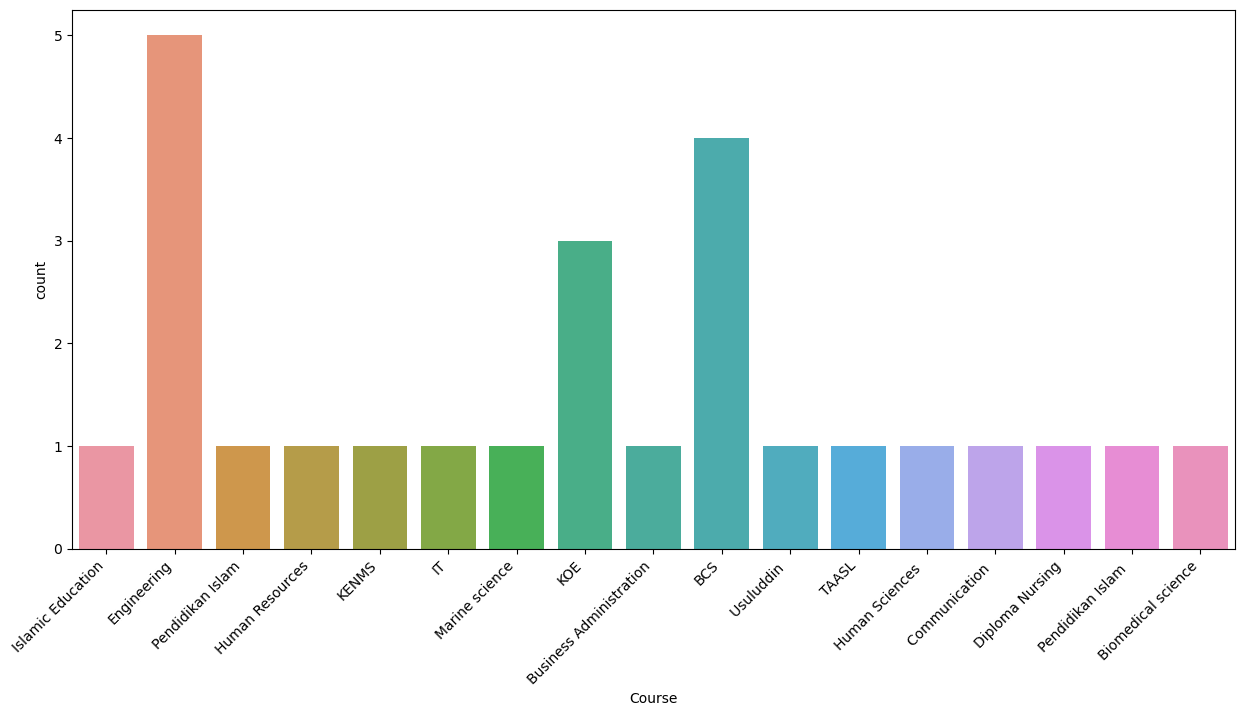

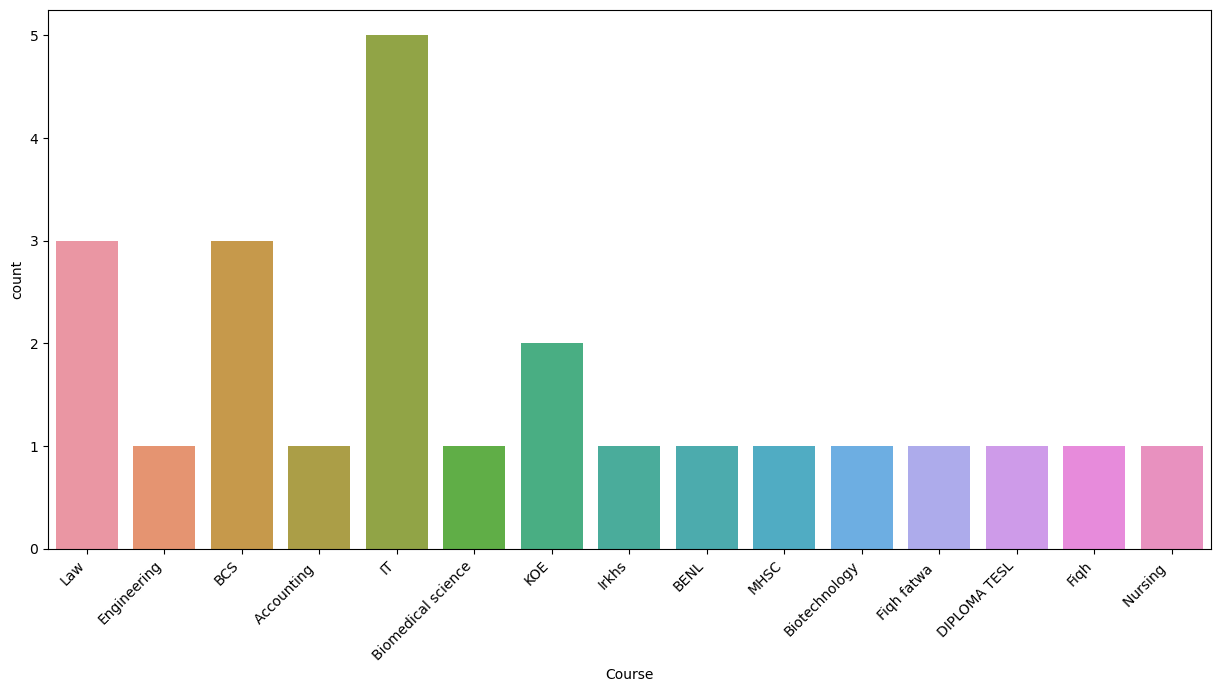

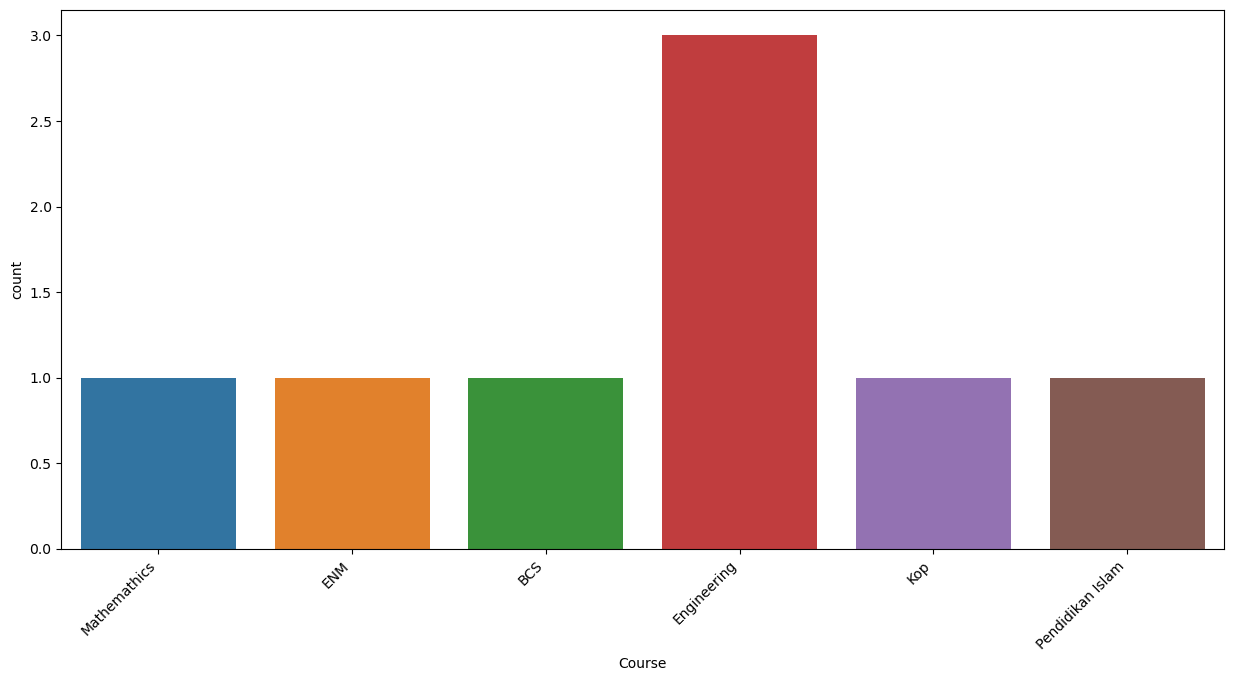

In [19]:
plt.show()

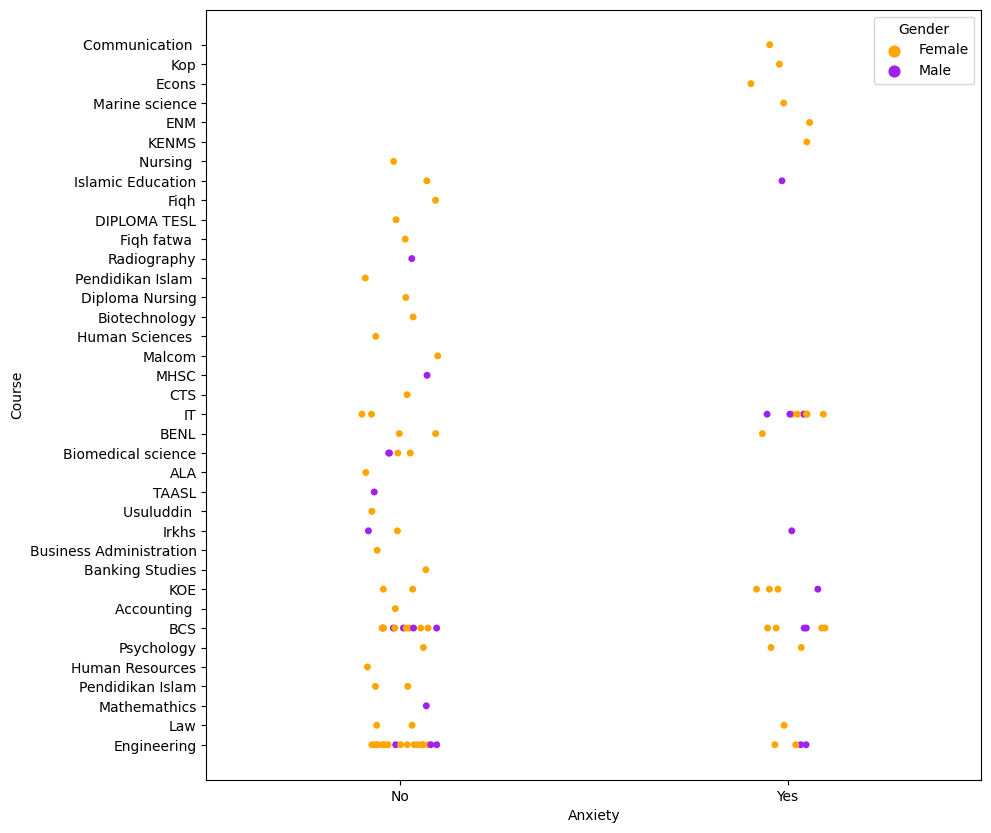

In [20]:
plt.figure(figsize = (10,10))
sns.stripplot(x="Anxiety", y="Course", hue="Gender", data=data, palette=["#FFA500", "#A020F0"])
plt.show()

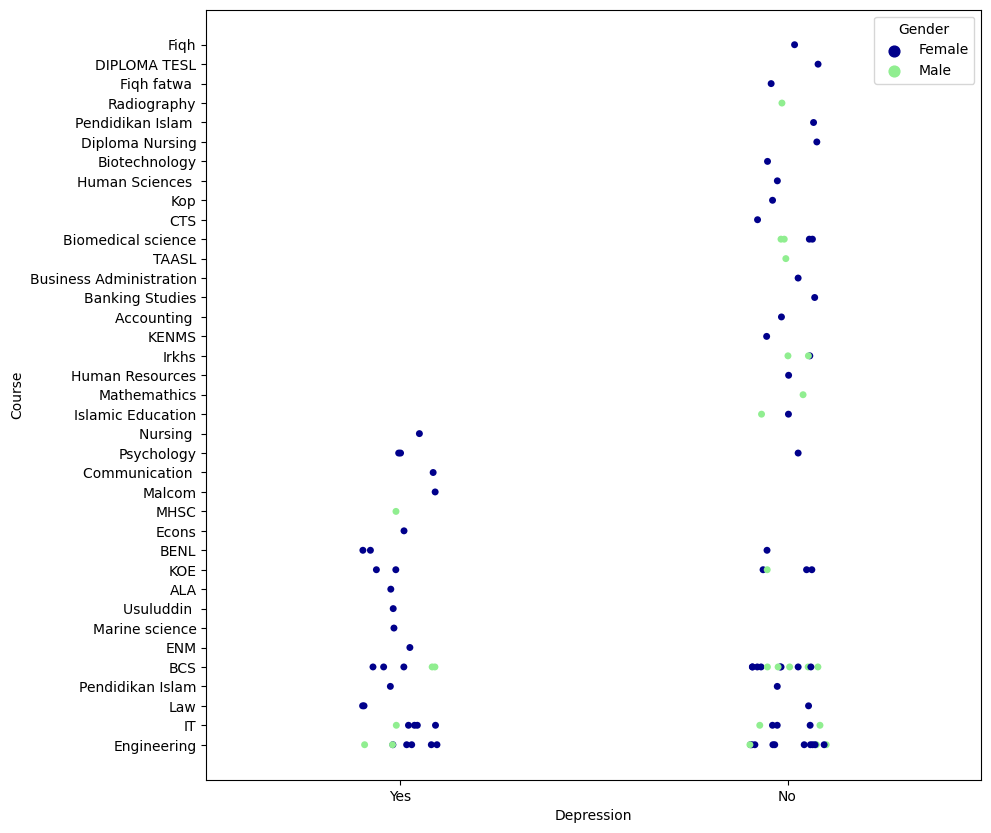

In [21]:
plt.figure(figsize = (10,10))
sns.stripplot(x="Depression", y="Course", hue="Gender", data=data, palette=["#00008B", "#90EE90"])
plt.show()

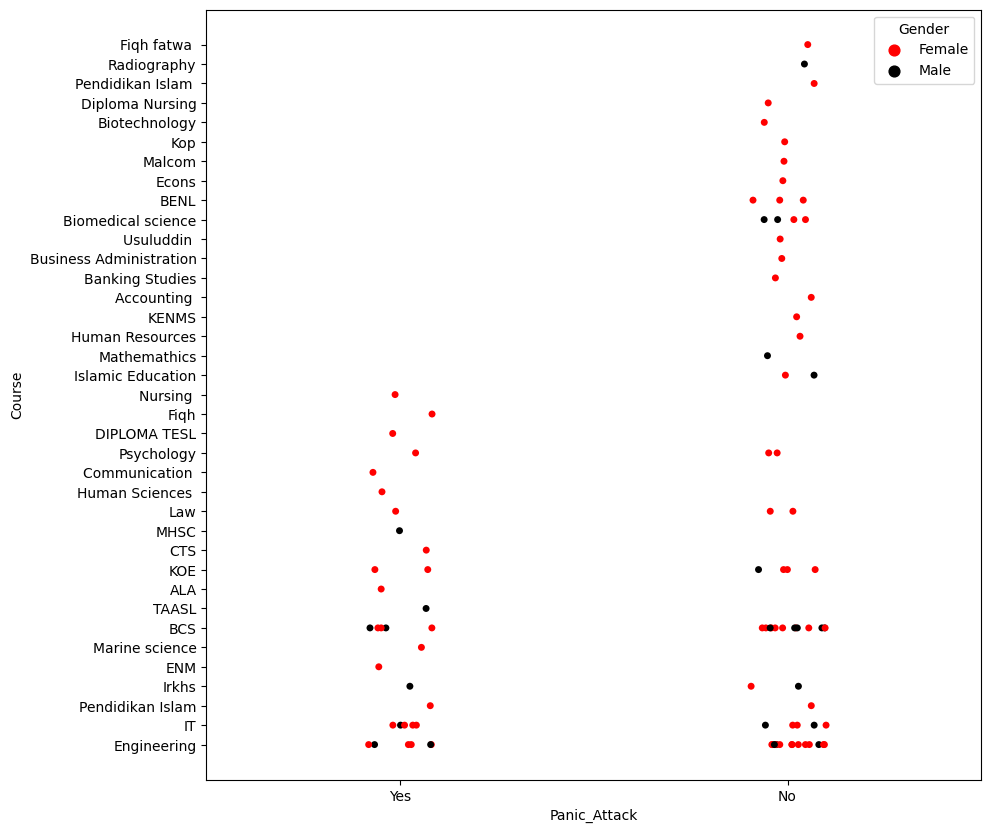

In [22]:
plt.figure(figsize = (10,10))
sns.stripplot(x="Panic_Attack", y="Course", hue="Gender", data=data, palette=["#FF0000", "#000000"])
plt.show()

In [23]:
data.drop('Timestamp', axis=1, inplace=True)
data.head(20)

,Gender,Age,Course,Year,GPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
5,Male,19.0,Engineering,2,3.50 - 4.00,No,No,No,Yes,No
6,Female,23.0,Pendidikan Islam,2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,Female,18.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
8,Female,19.0,Human Resources,2,2.50 - 2.99,No,No,No,No,No
9,Male,18.0,Irkhs,1,3.50 - 4.00,No,No,Yes,Yes,No


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
category_columns = [x for x in data.columns if data.dtypes[x] == 'object']
for column in category_columns:
    data[column] = encoder.fit_transform(data[column])
data.head()

,Gender,Age,Course,Year,GPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,0,18.0,14,1,3,0,1,0,1,0
1,1,21.0,21,2,3,0,0,1,0,0
2,1,19.0,19,1,3,0,1,1,1,0
3,0,22.0,25,3,3,1,1,0,0,0
4,1,23.0,29,4,3,0,0,0,0,0


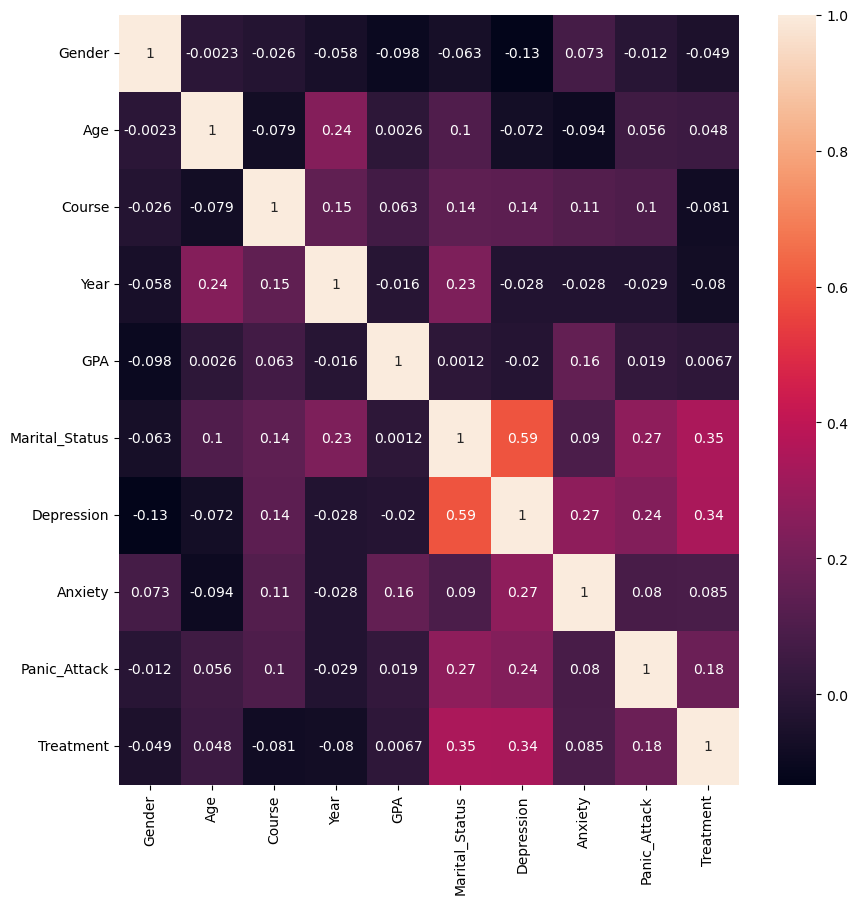

In [25]:
correlation_map = data.corr()
matrix = plt.figure(figsize=(10,10))
matrix = sns.heatmap(correlation_map, annot=True, cmap=None)
plt.show(matrix)